# Week 2

In [226]:
import pandas as pd
import matplotlib.pyplot as mp
from matplotlib.pyplot import figure
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge

### Linear regression with one variable

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss. This script has already been set up to load this data for you.

In [227]:
df = pd.read_csv('ex1data1.txt', header=None)

X = df[0].values.reshape(len(df[0]),1)
y = df[1].values

min(X)

array([5.0269])

In [221]:

len(df[df[1] < np.median(df[1])])
np.median(df[1])

4.5623

In [225]:
df.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


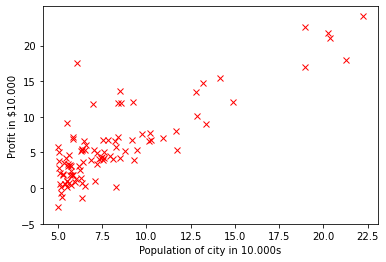

In [59]:
mp.plot(X, y, 'rx')
mp.xlabel('Population of city in 10.000s')
mp.ylabel('Profit in $10.000')
mp.yticks(range(-5, 25, 5))
mp.show()

In [233]:
lin_reg = LinearRegression().fit(X, y)

print(lin_reg.score(X, y))
print(lin_reg.coef_)
print(lin_reg.intercept_)

lin_reg.predict(np.array([[3.5]]))[0] * 10_000

0.7020315537841397
[1.19303364]
-3.89578087831185


2798.3687635172673

In [13]:
lasso = Lasso(alpha=0.1).fit(X,y)

print(lasso.score(X, y))
print(lasso.coef_)
print(lasso.intercept_)

lasso.predict([[3.5]])[0] * 10_000

0.702009101492451
[1.18628674]
-3.84072746797664


3112.761127888959

In [14]:
ridge = Ridge(alpha=0.1).fit(X,y)

print(ridge.score(X, y))
print(ridge.coef_)
print(ridge.intercept_)

ridge.predict([[3.5]])[0] * 10_000

0.7020315503881828
[1.19295067]
-3.8951038061199554


2802.2353055891267

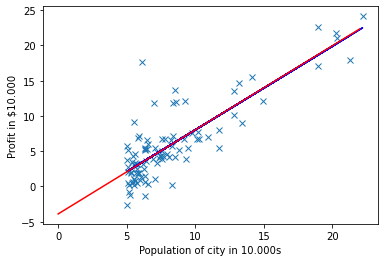

In [55]:
x_lr = np.linspace(0, 22, 22)
y_lr = lin_reg.coef_ * x_lr + lin_reg.intercept_

mp.plot(X, y, 'x', X, lasso.coef_ * X + lasso.intercept_, 'b')
mp.plot(x_lr, y_lr, 'r')
mp.xlabel('Population of city in 10.000s')
mp.ylabel('Profit in $10.000')
mp.show()

#### Интересно, что при возрастании населения с 35000 до 70000 (в два раза), выручка вырастает в 10 раз.
Может быть это значит, что открыть кафе в разных городах стоит одинаково, но "отбить" стоимость в маленьком городе сложнее.

#### В маленьком городе нужно субсидировать малый бизнес.

In [36]:
# коэф-ты из MATLAB'a
print(35000 * 1.166362 - 36302.91)
print(70000 * 1.166362 - 36302.91)
print(140000 * 1.166362 - 36302.91)

4519.759999999995
45342.42999999999
126987.76999999999


### Normalization

In [107]:
from sklearn.preprocessing import scale

df = pd.read_csv('ex1data2.txt', header=None)
A = df.values[:,:-1]

mean = np.mean(A, axis=0)
std = np.std(A, axis=0)
print(mean)
print(std)

[2000.68085106    3.17021277]
[7.86202619e+02 7.52842809e-01]


In [108]:
print(((A - mean)/ std)[:2])
print()
print(scale(A)[:2])

[[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]]

[[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]]


### Linear regression with multiple variables

In [205]:
df = pd.read_csv('ex1data2.txt', header=None)

y = df.values[:, -1]
X = df.values[:, :-1]

In [176]:
lin_reg = LinearRegression().fit(X, y)

print(lin_reg.score(X, y))
print(lin_reg.coef_)
print(lin_reg.intercept_)

lin_reg.predict(np.array([[1650, 3]]))[0]

0.7329450180289141
[  139.21067402 -8738.01911233]
89597.90954279748


293081.4643348961

#### Using Normal Equation

In [206]:
df = pd.read_csv('ex1data2.txt', header=None)

y = df.values[:, -1]
X = df.values[:, :-1]

# нужно добавить столбец единиц к матрице X, чтобы получить свободный члено theta_0 
X = np.c_[ np.ones(len(X)), X ] 
theta = np.linalg.pinv(X.transpose() @ X) @ X.transpose() @ y

# дом на 1650 кв метров, с 3 спальнями
input_data = [1, 1650, 3]
price = theta @ input_data
price

293081.4643349892

# Week 7 SVM

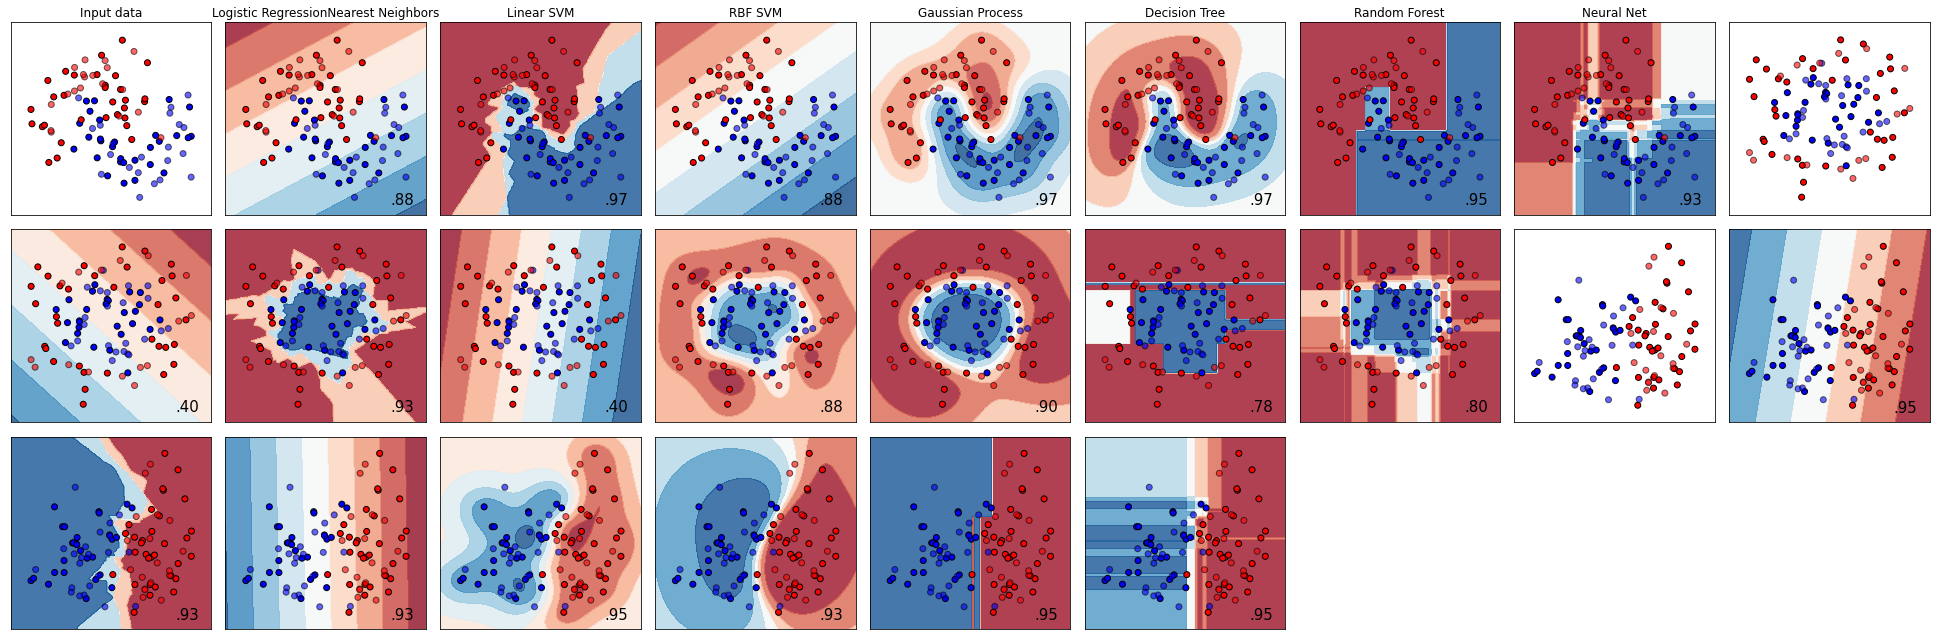

In [8]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

h = 0.02  # step size in the mesh

names = [
    "Logistic Regression"
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net"
]

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000)
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()
